In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r'dataset\Employee.csv')

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
JoiningYear,4653.0,2015.062970,1.863377,2012.0,2013.0,2015.0,2017.0,2018.0
PaymentTier,4653.0,2.698259,0.561435,1.0,3.0,3.0,3.0,3.0
Age,4653.0,29.393295,4.826087,22.0,26.0,28.0,32.0,41.0
ExperienceInCurrentDomain,4653.0,2.905652,1.558240,0.0,2.0,3.0,4.0,7.0
LeaveOrNot,4653.0,0.343864,0.475047,0.0,0.0,0.0,1.0,1.0


## Get a sense of how the distribution looks like to descide which algorithm to use
In this case we won't use logistic regression due to mixed data nature

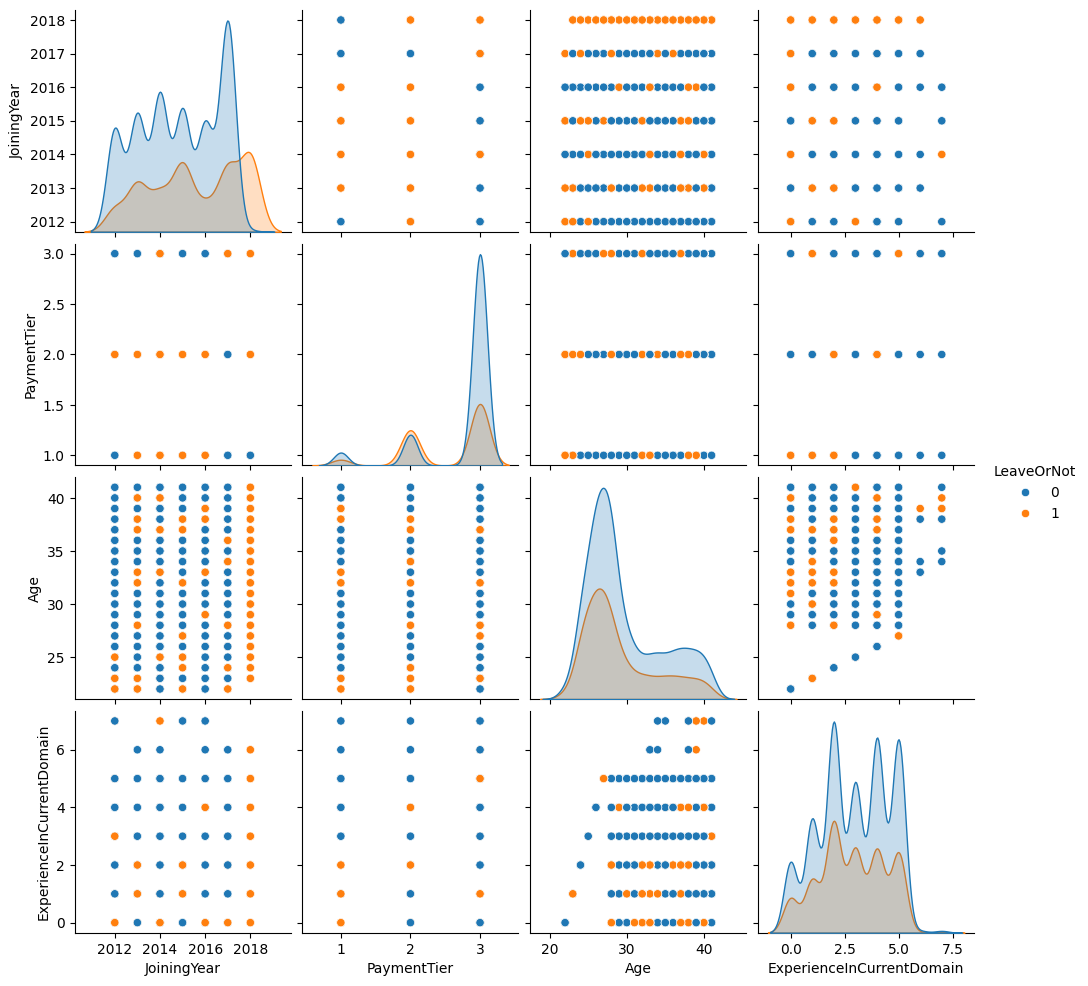

In [5]:
sns.pairplot(df, hue = 'LeaveOrNot')

In [6]:
df['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [7]:
qualification_map = {'Bachelors': 0, 'Masters': 1, 'PHD': 2}
df['Education'] = [qualification_map[edu] for edu in df['Education']]

In [8]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,Bangalore,3,34,Male,No,0,0
1,0,2013,Pune,1,28,Female,No,3,1
2,0,2014,New Delhi,3,38,Female,No,2,0
3,1,2016,Bangalore,3,27,Male,No,5,1
4,1,2017,Pune,3,24,Male,Yes,2,1


In [9]:
df['City'].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [10]:
qualification_map = {'Bangalore': 0, 'Pune': 1, 'New Delhi': 2}
df['City'] = [qualification_map[city] for city in df['City']]

In [11]:
df['Gender'] = [1 if gender =='Male' else 0 for gender in df['Gender']]

In [12]:
df['EverBenched'] = [1 if benched =='Yes' else 0 for benched in df['EverBenched']]

## Change all features into numerical number

In [13]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,1,1,28,0,0,3,1
2,0,2014,2,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,1,3,24,1,1,2,1


In [14]:
cols = df.columns
cols

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

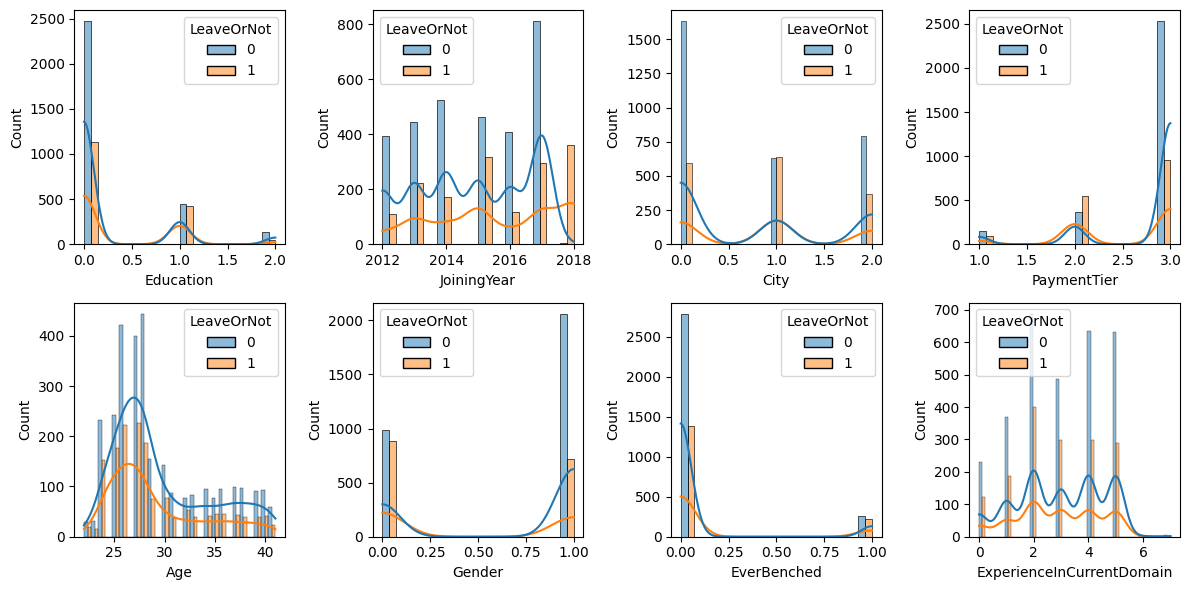

In [15]:
fig, axes = plt.subplots(2,4,figsize=(12,6))
for index, col in enumerate(cols[:4]):
    sns.histplot(x=df[col],ax=axes[0,index],hue=df.LeaveOrNot,kde=True,multiple="dodge")
for index, col in enumerate(cols[4:-1]):
    sns.histplot(x=df[col],ax=axes[1,index],hue=df.LeaveOrNot,kde=True,multiple="dodge")
plt.tight_layout()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
x = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=0)
print(xtrain.shape, xtest.shape)

(3722, 8) (931, 8)


In [19]:
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [20]:
param_grid = {'n_estimators':[5, 10, 15, 20, 25, 30, 50, 100, 200, 400]}

In [21]:
kfold = KFold(n_splits=5)

In [22]:
RFgrid = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=kfold, scoring='accuracy')

In [23]:
RFgrid.fit(xtrain, ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=0),
             param_grid={'n_estimators': [5, 10, 15, 20, 25, 30, 50, 100, 200,
                                          400]},
             scoring='accuracy')

In [24]:
result = RFgrid.cv_results_

In [25]:
dfRF = pd.DataFrame(result)

In [26]:
dfRF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018235,0.002568,0.002758,0.000694,5,{'n_estimators': 5},0.812081,0.814765,0.823925,0.795699,0.813172,0.811928,0.009132,10
1,0.030637,0.002862,0.002861,0.000443,10,{'n_estimators': 10},0.817450,0.828188,0.836022,0.805108,0.814516,0.820257,0.010787,9
2,0.043862,0.000755,0.003534,0.000431,15,{'n_estimators': 15},0.824161,0.844295,0.836022,0.814516,0.811828,0.826164,0.012419,5
3,0.060896,0.005370,0.003996,0.000006,20,{'n_estimators': 20},0.824161,0.834899,0.833333,0.813172,0.811828,0.823479,0.009695,8
4,0.068769,0.000605,0.004561,0.000774,25,{'n_estimators': 25},0.828188,0.833557,0.841398,0.818548,0.814516,0.827241,0.009785,2
5,0.088085,0.003805,0.005585,0.000478,30,{'n_estimators': 30},0.826846,0.829530,0.840054,0.826613,0.813172,0.827243,0.008578,1
6,0.144305,0.012065,0.007611,0.000698,50,{'n_estimators': 50},0.826846,0.833557,0.833333,0.822581,0.814516,0.826167,0.007142,4
7,0.295503,0.019667,0.015175,0.000616,100,{'n_estimators': 100},0.830872,0.828188,0.841398,0.817204,0.817204,0.826973,0.009117,3
8,0.598888,0.031645,0.027993,0.003218,200,{'n_estimators': 200},0.828188,0.824161,0.841398,0.813172,0.814516,0.824287,0.010267,7
9,1.261629,0.185953,0.054163,0.009341,400,{'n_estimators': 400},0.832215,0.830872,0.841398,0.810484,0.814516,0.825897,0.011593,6


In [27]:
best_n = RFgrid.best_params_
best_n

{'n_estimators': 30}

<Axes: xlabel='param_n_estimators', ylabel='mean_test_score'>

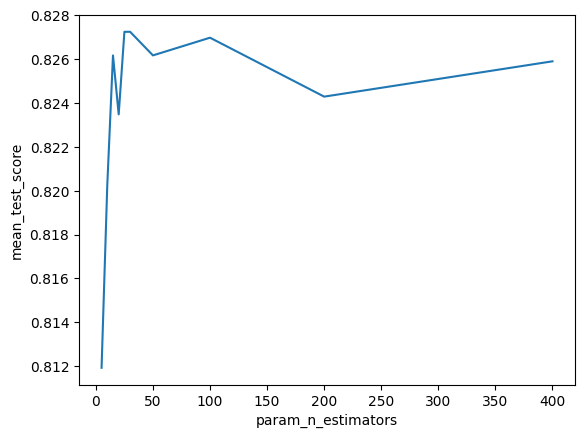

In [28]:
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=dfRF)

In [29]:
clfbest = cross_val_score(RandomForestClassifier(n_estimators=30, random_state=0),xtrain, ytrain, cv=kfold, scoring='accuracy')

In [30]:
np.mean(clfbest)

0.8272429097207187

In [31]:
RFbest = RandomForestClassifier(n_estimators=30, random_state=0)
RFbest.fit(xtrain,ytrain)
bestpredict = RFbest.predict(xtest)

In [32]:
print(accuracy_score(ytest,bestpredict))

0.8152524167561761


<Axes: >

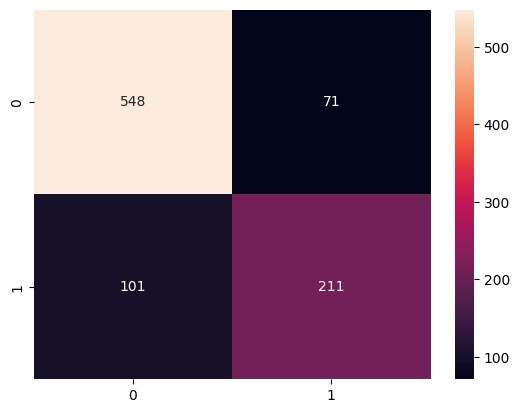

In [33]:
cm = confusion_matrix(ytest, bestpredict)
sns.heatmap(cm, annot=True, fmt=',.0f')

## Conclusion 1: <br> RandomForest's best n_estimators in this case is 30 and overall accuracy is around 0.815

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [35]:
param_grid = {'KNCLF__n_neighbors':[3,4,5,6,7,8,9,10]}
pipeline = Pipeline([
    ('Scaler',MinMaxScaler()),
    ('KNCLF',KNeighborsClassifier())
])

In [36]:
KNgrid = GridSearchCV(pipeline,param_grid,scoring='accuracy',cv=5)

In [37]:
KNgrid.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scaler', MinMaxScaler()),
                                       ('KNCLF', KNeighborsClassifier())]),
             param_grid={'KNCLF__n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [38]:
dfKN = pd.DataFrame(KNgrid.cv_results_)
dfKN

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_KNCLF__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011838,0.001906,0.046012,0.005894,3,{'KNCLF__n_neighbors': 3},0.809396,0.812081,0.827957,0.799731,0.780914,0.806016,0.015487,8
1,0.009378,0.000983,0.033864,0.002356,4,{'KNCLF__n_neighbors': 4},0.824161,0.837584,0.823925,0.797043,0.787634,0.814069,0.018658,6
2,0.008627,0.000402,0.036724,0.002324,5,{'KNCLF__n_neighbors': 5},0.822819,0.833557,0.826613,0.793011,0.801075,0.815415,0.015601,4
3,0.008062,0.000083,0.032499,0.001146,6,{'KNCLF__n_neighbors': 6},0.822819,0.833557,0.817204,0.813172,0.787634,0.814877,0.015248,5
4,0.007937,0.000678,0.032474,0.000661,7,{'KNCLF__n_neighbors': 7},0.825503,0.828188,0.826613,0.803763,0.797043,0.816222,0.013118,1
5,0.008052,0.000170,0.034648,0.002409,8,{'KNCLF__n_neighbors': 8},0.829530,0.830872,0.822581,0.803763,0.794355,0.816220,0.014598,2
6,0.009496,0.002322,0.037175,0.001803,9,{'KNCLF__n_neighbors': 9},0.825503,0.821477,0.827957,0.806452,0.795699,0.815417,0.012368,3
7,0.008435,0.000732,0.035218,0.001884,10,{'KNCLF__n_neighbors': 10},0.824161,0.825503,0.822581,0.802419,0.788978,0.812729,0.014569,7


In [39]:
KNbest = KNeighborsClassifier(n_neighbors=7)

In [40]:
KNbest.fit(xtrain,ytrain)
KNbestpredict = KNbest.predict(xtest)
print(accuracy_score(ytest,KNbestpredict))

0.7540279269602578


<Axes: >

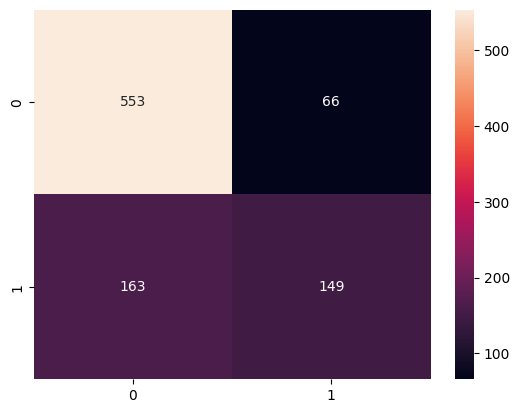

In [41]:
kncm = confusion_matrix(ytest, KNbestpredict)
sns.heatmap(kncm, annot=True, fmt=',.0f')

In [42]:
print(classification_report(ytest, KNbestpredict))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       619
           1       0.69      0.48      0.57       312

    accuracy                           0.75       931
   macro avg       0.73      0.69      0.70       931
weighted avg       0.75      0.75      0.74       931



## Conclusion 2: <br> KNN's best n_neighbors in this case is 7 and overall accuracy is around 0.7540

In [43]:
from xgboost import XGBClassifier

In [44]:
xgb = XGBClassifier(random_state=0)

In [45]:
param_gridXG = {'n_estimators':[5, 10, 15, 20, 25, 30, 45, 40, 50]}

In [46]:
grid2 = GridSearchCV(xgb, param_gridXG, cv=kfold, scoring='accuracy')

In [47]:
grid2.fit(xtrain, ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'n_estimators': [5, 10, 15, 20, 25, 30, 45, 40, 50]},
             scoring='accuracy')

In [48]:
result = grid2.cv_results_
dfXG = pd.DataFrame(result)
dfXG

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025132,0.008231,0.005867,0.000945,5,{'n_estimators': 5},0.840268,0.879195,0.844086,0.836022,0.844086,0.848731,0.015520,5
1,0.026495,0.001596,0.005576,0.000590,10,{'n_estimators': 10},0.848322,0.877852,0.864247,0.842742,0.838710,0.854375,0.014601,1
2,0.025148,0.001482,0.005028,0.000522,15,{'n_estimators': 15},0.841611,0.881879,0.860215,0.831989,0.830645,0.849268,0.019428,4
3,0.029364,0.001965,0.004732,0.001042,20,{'n_estimators': 20},0.844295,0.876510,0.853495,0.831989,0.833333,0.847925,0.016298,8
4,0.033624,0.002127,0.004941,0.000859,25,{'n_estimators': 25},0.848322,0.876510,0.853495,0.829301,0.836022,0.848730,0.016331,6
5,0.038583,0.003225,0.006518,0.001830,30,{'n_estimators': 30},0.845638,0.879195,0.856183,0.830645,0.836022,0.849536,0.017196,3
6,0.056241,0.004830,0.004836,0.000353,45,{'n_estimators': 45},0.849664,0.875168,0.856183,0.830645,0.837366,0.849805,0.015529,2
7,0.048804,0.002185,0.005157,0.000534,40,{'n_estimators': 40},0.845638,0.875168,0.854839,0.829301,0.836022,0.848193,0.016021,7
8,0.062472,0.002494,0.006011,0.001518,50,{'n_estimators': 50},0.842953,0.876510,0.853495,0.826613,0.833333,0.846581,0.017498,9


In [49]:
best_n = grid2.best_params_
best_n

{'n_estimators': 10}

<Axes: xlabel='param_n_estimators', ylabel='mean_test_score'>

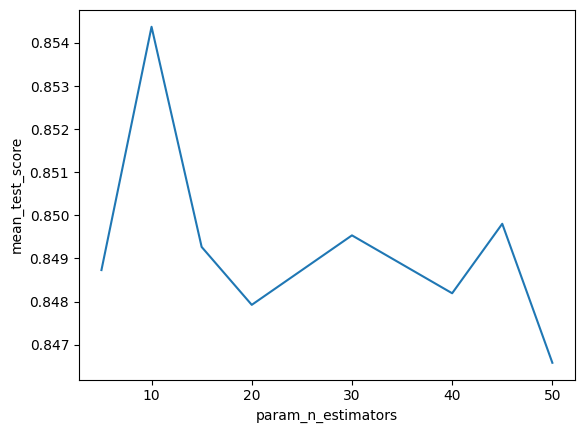

In [50]:
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=dfXG)

In [51]:
xgbbest = XGBClassifier(n_estimators=best_n['n_estimators'], random_state=0)
xgbbest.fit(xtrain,ytrain)
xgbestpredict = xgbbest.predict(xtest)
print(accuracy_score(ytest,xgbestpredict))

0.849624060150376


<Axes: >

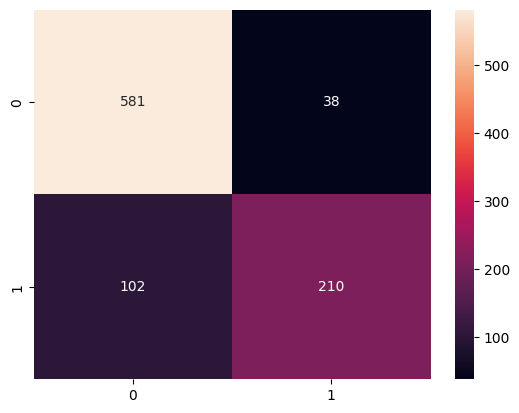

In [52]:
cm = confusion_matrix(ytest, xgbestpredict)
sns.heatmap(cm, annot=True, fmt=',.0f',xticklabels=True,yticklabels=True)

## Conclusion 3: <br> XGboost's best n_estimators in this case is 10 and overall accuracy is around 0.850

In [53]:
xt = {'Education':0,'JoiningYear':2015,'City':1,'PaymentTier':2,'Age':22,'Gender':0,'EverBenched':0,'ExperienceInCurrentDomain':1}
xt = pd.DataFrame([xt])

In [54]:
print(xgbbest.predict(xt))

[1]


## Now check if different score function will have better performance <br>and how many features needed to support it

In [55]:
from sklearn.feature_selection import SelectKBest, f_regression, chi2

In [56]:
from sklearn.pipeline import Pipeline

In [57]:
pipeline = Pipeline([
    ('selector',SelectKBest()),
    ('xgb',XGBClassifier(random_state=0))
])

In [58]:
param_gridXG = {'xgb__n_estimators':[5, 10, 15, 20, 25, 30],
               'selector__k':[1,2,3,4,5,6,7,8],
               'selector__score_func':[f_regression,chi2]}

In [59]:
grid3 = GridSearchCV(pipeline, param_gridXG, cv=kfold, scoring='accuracy')

In [60]:
grid3.fit(xtrain,ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('selector', SelectKBest()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=0, ...))]),
             param_grid={'selector__k': [1, 2, 3, 4, 5, 6, 7, 8],
                         'selector__score_func': [<function f_regression at 0x0000024324B701F0>,
                                                  <function chi2 at 0x0000024324B4FF40>],
                         'xgb__n_estimators': [5, 10, 15, 20, 25, 30]},
             scoring='accuracy')

In [61]:
resultdfkselect = pd.DataFrame(grid3.cv_results_)
resultdfkselect

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_selector__k,param_selector__score_func,param_xgb__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030307,0.014214,0.007348,0.001669,1,<function f_regression at 0x0000024324B701F0>,5,"{'selector__k': 1, 'selector__score_func': <fu...",0.660403,0.663087,0.625000,0.669355,0.651882,0.653945,0.015523,82
1,0.023326,0.005017,0.007572,0.002541,1,<function f_regression at 0x0000024324B701F0>,10,"{'selector__k': 1, 'selector__score_func': <fu...",0.660403,0.663087,0.625000,0.669355,0.651882,0.653945,0.015523,82
2,0.019676,0.001980,0.004775,0.000714,1,<function f_regression at 0x0000024324B701F0>,15,"{'selector__k': 1, 'selector__score_func': <fu...",0.660403,0.663087,0.625000,0.669355,0.651882,0.653945,0.015523,82
3,0.021213,0.000663,0.005203,0.000353,1,<function f_regression at 0x0000024324B701F0>,20,"{'selector__k': 1, 'selector__score_func': <fu...",0.660403,0.663087,0.625000,0.669355,0.651882,0.653945,0.015523,82
4,0.022650,0.001438,0.004687,0.000626,1,<function f_regression at 0x0000024324B701F0>,25,"{'selector__k': 1, 'selector__score_func': <fu...",0.660403,0.663087,0.625000,0.669355,0.651882,0.653945,0.015523,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.020362,0.001603,0.004643,0.000796,8,<function chi2 at 0x0000024324B4FF40>,10,"{'selector__k': 8, 'selector__score_func': <fu...",0.848322,0.877852,0.864247,0.842742,0.838710,0.854375,0.014601,1
92,0.021713,0.000800,0.004537,0.000465,8,<function chi2 at 0x0000024324B4FF40>,15,"{'selector__k': 8, 'selector__score_func': <fu...",0.841611,0.881879,0.860215,0.831989,0.830645,0.849268,0.019428,8
93,0.025033,0.001222,0.004121,0.000669,8,<function chi2 at 0x0000024324B4FF40>,20,"{'selector__k': 8, 'selector__score_func': <fu...",0.844295,0.876510,0.853495,0.831989,0.833333,0.847925,0.016298,14
94,0.027288,0.000912,0.004720,0.000391,8,<function chi2 at 0x0000024324B4FF40>,25,"{'selector__k': 8, 'selector__score_func': <fu...",0.848322,0.876510,0.853495,0.829301,0.836022,0.848730,0.016331,12


<Axes: xlabel='param_xgb__n_estimators', ylabel='mean_test_score'>

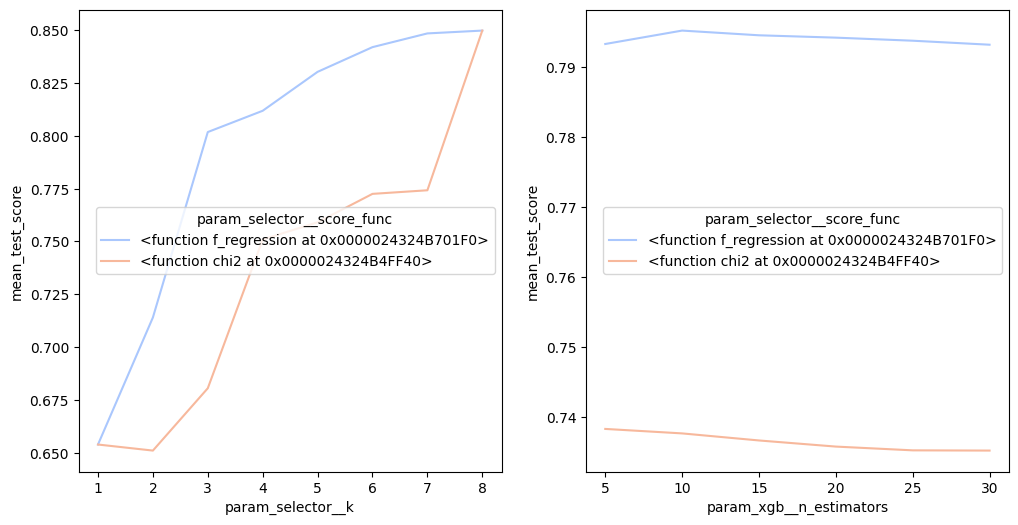

In [62]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
sns.lineplot(x='param_selector__k', y='mean_test_score', data=resultdfkselect, 
             hue='param_selector__score_func',palette='coolwarm',errorbar=None, ax=axs[0])
sns.lineplot(x='param_xgb__n_estimators', y='mean_test_score', data=resultdfkselect, 
             hue='param_selector__score_func',palette='coolwarm',errorbar=None, ax=axs[1])

## Even performance reach the same level but most of time chi2 is worse than f_regression <br>and n_estimator=10 still is the best option

In [103]:
rfbest = dfRF[dfRF['rank_test_score']==1][['split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score']]

In [104]:
knbest = dfKN[dfKN['rank_test_score']==1][['split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score']]

In [105]:
xgbest = dfXG[dfXG['rank_test_score']==1][['split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score']]

In [106]:
result = pd.concat([rfbest,knbest,xgbest],axis=0).reset_index()
result.rename(columns={'index':'model'},inplace=True)

In [107]:
result.model = ['RandomForest','KNN','XGboost']
result = pd.melt(result,id_vars='model',var_name='KFoldTest',value_name='Accuracy')
result

,model,KFoldTest,Accuracy
0,RandomForest,split0_test_score,0.826846
1,KNN,split0_test_score,0.825503
2,XGboost,split0_test_score,0.848322
3,RandomForest,split1_test_score,0.829530
4,KNN,split1_test_score,0.828188
5,XGboost,split1_test_score,0.877852
6,RandomForest,split2_test_score,0.840054
7,KNN,split2_test_score,0.826613
8,XGboost,split2_test_score,0.864247
9,RandomForest,split3_test_score,0.826613


([0, 1, 2, 3, 4],
 [Text(0, 0, 'split0_test_score'),
  Text(1, 0, 'split1_test_score'),
  Text(2, 0, 'split2_test_score'),
  Text(3, 0, 'split3_test_score'),
  Text(4, 0, 'split4_test_score')])

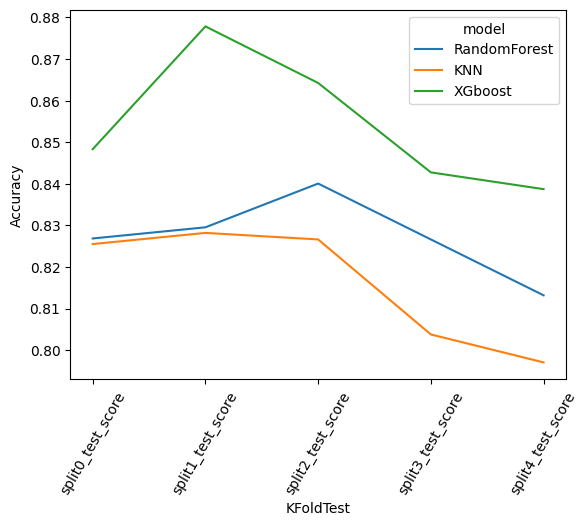

In [109]:
sns.lineplot(result, x='KFoldTest',y='Accuracy',hue='model')
plt.xticks(rotation=60)

## Overall we could see XGboost have better performance across all cross validation.